In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import datetime
import seaborn as sns

In [48]:
## interested assets
# stocks = ['FB', 'MSFT', 'AAPL', 'IBM']
# stocks = ['FB', 'GOOGL', 'TSLA','AAPL']
stocks= ['FB', 'MSFT', 'AAPL', 'IBM', 'GOOGL', 'TSLA', 'AMZN', 'JPC']
## get "Adjusted close" data for the stocks
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2021,1,1)
data = pd.DataFrame()
for stock in stocks:
    data[stock] = pdr.DataReader(stock,data_source= 'yahoo')['High']
# data    

In [49]:
# data.plot()
# plt.grid()

In [44]:
stocks= ['FB', 'MSFT', 'AAPL', 'IBM', 'GOOGL', 'TSLA', 'AMZN', 'JPC']
def plot_cvar( stocks= ['FB', 'MSFT', 'AAPL','JPC'], start = datetime.datetime(2013,1,1), end = datetime.datetime(2021,1,1)):
    
    data = pd.DataFrame()
    for stock in stocks:
        data[stock] = pdr.DataReader(stock,data_source= 'yahoo')['High']
    rtrn_data = data/data.shift(1)
    rtrn_data =  np.log(rtrn_data[1:])

    cov_matrix = rtrn_data.cov()
    for st in  stocks :  
        cov_matrix[st][st] = 0

    return sns.heatmap(cov_matrix )

In [56]:
tech_stcks = [ 'FB', 'MSFT', 'AAPL', 'IBM', 'GOOGL', 'AMZN' ]
motor_stcks = [ 'TSLA', 'F', 'HMC', 'GM', 'STLA', 'VWAGY']
fin_stcks=  [ 'JPC', 'BAC', 'MS', 'C', 'DFS', 'PNC' ]

<AxesSubplot:>

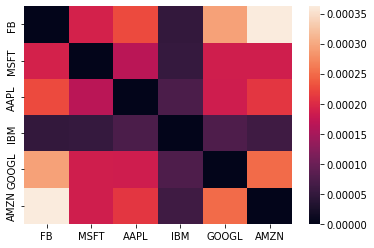

In [51]:
plot_cvar( tech_stcks )

<AxesSubplot:>

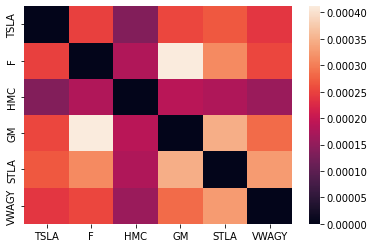

In [52]:
plot_cvar( motor_stcks )

<AxesSubplot:>

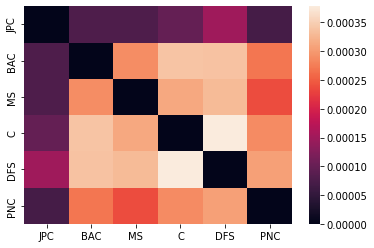

In [57]:
plot_cvar(fin_stcks)

<AxesSubplot:>

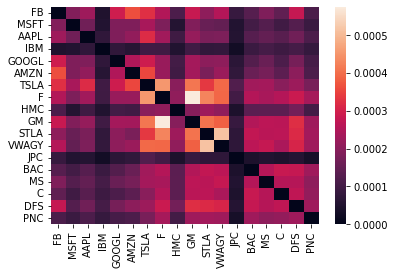

In [58]:
stcks_net = tech_stcks + motor_stcks + fin_stcks
plot_cvar(stcks_net)

### Sharpe ratio

In [6]:
## uniform weight portfoliio ~
weights = np.full(len(stocks), 1/(len(stocks)))
rtrn_pf = np.sum(rtrn_data.mean()*weights)
std_pf = np.sqrt( np.dot(weights.T, np.dot(cov_matrix, weights)) )
sr_pf = rtrn_pf/std_pf
sr_pf

0.09248751875252585

In [7]:
## ensemble of random portfolios ~
n_pf = 500
rtrn_pf = np.zeros(n_pf)
std_pf = np.zeros(n_pf)
srp_pf = np.zeros(n_pf)
weights_pf = []
rtrn_data_mean = rtrn_data.mean()
for j in range(n_pf):
    
    ## generate random portfolios~
    weight_pf = np.random.random(len(stocks))
    weight_pf = weight_pf/sum(weight_pf)
    weights_pf.append(weight_pf)
    
    ## evaluate return and std~
    rtrn_pf[j] = np.dot(rtrn_data_mean, weight_pf)*252
    std_pf[j] = np.sqrt( np.dot(weight_pf.T, np.dot(cov_matrix, weight_pf)) )
    if(std_pf[j] !=0) :
         srp_pf[j] = rtrn_pf[j]/std_pf[j]

/tmp/ipykernel_26055/1440830780.py:19: RuntimeWarning: invalid value encountered in true_divide
  srp_pf[j] = rtrn_pf/std_pf


Text(0, 0.5, 'av. return')

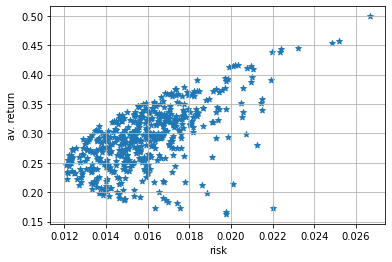

In [ ]:
plt.scatter(std_pf, rtrn_pf, marker= '*')
plt.grid()
plt.xlabel("risk")
plt.ylabel("av. return")